# Make plot highlighting record datasets over time

In [1]:
from mizani.formatters import comma_format
import pandas as pd
import plotnine as p

%pylab inline
# %config InlineBackend.figure_formats = ['retina']

from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('https://nxn.se/single-cell-studies/data.tsv', sep='\t')
data['Date'] = data['Date'].pipe(pd.to_datetime, format='%Y%m%d')
data['Reported cells total'] = data['Reported cells total'].str.replace(',', '').map(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
df = data.query('Measurement == "RNA-seq"')

In [4]:
df = df.sort_values('Date')

In [5]:
df['Record breaker'] = False

record = 0
for n, row in df.iterrows():
    if row['Reported cells total'] > record:
        df.loc[n, 'Record breaker'] = True
        record = row['Reported cells total']

In [6]:
df.query('`Record breaker` == True');

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 311 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


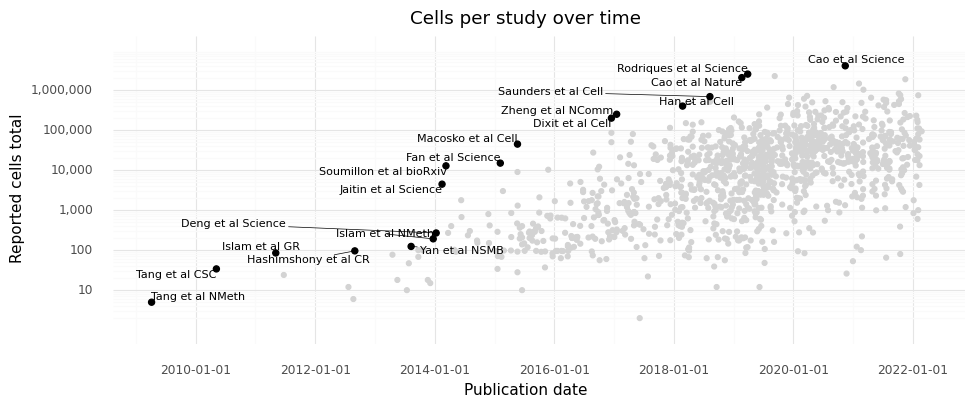

<ggplot: (8742279408525)>

In [7]:
p.options.figure_size = (11, 4)

fig =  (
    p.ggplot(p.aes(x = 'Date', y = 'Reported cells total'), df)
    + p.geom_point(color = 'lightgrey')
    + p.geom_point(size = 2, color = 'black', data = df.query('`Record breaker` == True'))
    + p.geom_text(
        p.aes(label = 'Shorthand'),
        data = df.query('`Record breaker` == True'),
        size = 8,
        adjust_text = {
            'expand_points': (1, 1.1),
            'expand_text': (1.5, 1.05),
            'arrowprops': {
                'arrowstyle': '-',
                'color': 'black',
                'lw': 0.5,
                'zorder': 0
            },
            'autoalign': 'y',
        }
    )
    + p.scale_y_log10(breaks = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6], limits = (1, 1e7), labels = comma_format())
    + p.scale_x_datetime()
    + p.theme_minimal()
    + p.labs(title = 'Cells per study over time', x = 'Publication date')
)

fig